In [1]:
import glob
import os
import tarfile

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import get_file

DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
DATA_NAME = 'cinic10'
FILE_EXTENSION = 'tar.gz'
FILE_NAME = '.'.join([DATA_NAME, FILE_EXTENSION])

In [2]:
# Downloading the data
downloaded_file_location = get_file(origin=DATASET_URL, fname=FILE_NAME, extract=False)

687546368/687544992 [==============================] - 2539s 4us/step


In [30]:
print(downloaded_file_location)

C:\Users\lhm\.keras\datasets\cinic10.tar.gz


In [31]:
data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)
print(data_directory)
print(_)

C:\Users\lhm\.keras\datasets
cinic10.tar.gz


In [32]:
data_directory = os.path.sep.join([data_directory, DATA_NAME])
tar = tarfile.open(downloaded_file_location)

In [35]:
print(data_directory)
print(tar)

C:\Users\lhm\.keras\datasets\cinic10


In [12]:
if not os.path.exists(data_directory):
    tar.extractall(data_directory)

In [13]:
print(f'Data downloaded to {data_directory}')

Data downloaded to C:\Users\lhm\.keras\datasets\cinic10


In [18]:
data_pattern = os.path.sep.join([data_directory, '*\\*\\*.png'])

In [19]:
data_pattern

'C:\\Users\\lhm\\.keras\\datasets\\cinic10\\*\\*\\*.png'

# Using Keras API
To load individual images:
* glob pattern to get list of items
* load_image from one of the image paths from the list
* show the image

To load batches
* create ImageDataGenerator
* do ImageDataGenerator.flow_from_directory
* create for loop to iterate through the flow_from_directory item. Set "break" at the end of one iteration through the loop to get just one batch

In [20]:
image_paths = list(glob.glob(data_pattern))

In [40]:
for i in range(5):
    print(image_paths[i])

C:\Users\lhm\.keras\datasets\cinic10\test\airplane\cifar10-test-10.png
C:\Users\lhm\.keras\datasets\cinic10\test\airplane\cifar10-test-1001.png
C:\Users\lhm\.keras\datasets\cinic10\test\airplane\cifar10-test-1010.png
C:\Users\lhm\.keras\datasets\cinic10\test\airplane\cifar10-test-1018.png
C:\Users\lhm\.keras\datasets\cinic10\test\airplane\cifar10-test-1022.png


In [41]:
print(f'Sample image path: {image_paths[0]}')

Sample image path: C:\Users\lhm\.keras\datasets\cinic10\test\airplane\cifar10-test-10.png


In [26]:
# load a single image
sample_image = load_img(image_paths[0])
print(f'Image type: {type(sample_image)}')
print(f'Image format: {sample_image.format}')
print(f'Image mode: {sample_image.mode}')
print(f'Image size: {sample_image.size}')

Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
Image format: PNG
Image mode: RGB
Image size: (32, 32)


Image array shape: (32, 32, 3)


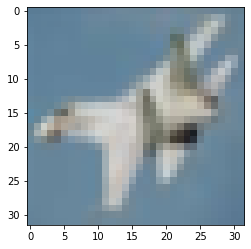

In [28]:
# Convert image to array
sample_image_array = img_to_array(sample_image)
print(f'Image array shape: {sample_image_array.shape}')
plt.imshow(sample_image_array / 255.0)

In [42]:
# load a batch of images
scale_factor = 1.0 / 255.0
image_generator = ImageDataGenerator(horizontal_flip=True, rescale=scale_factor)

In [43]:
image_generator

In [48]:
new_directory = os.path.sep.join([data_directory,"train"])
new_directory

'C:\\Users\\lhm\\.keras\\datasets\\cinic10\\train'

In [57]:
iterator = image_generator.flow_from_directory(directory=new_directory, batch_size=10)
iterator

Found 90000 images belonging to 10 classes.


In [56]:
iterator = (image_generator.flow_from_directory(directory=new_directory, batch_size=10))
iterator

Found 90000 images belonging to 10 classes.


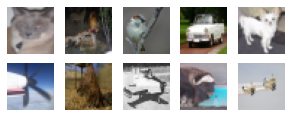

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [52]:
for batch, labels in iterator:
    plt.figure(figsize=(5, 5))
    for index, image in enumerate(batch, start=1):
        ax = plt.subplot(5, 5, index)
        plt.imshow(image)
        plt.axis('off')
        
    plt.show()
    print(label)
    break

# Loading Images with tf_data api
To load individual images:
* feed data_pattern into tf.data.Dataset.list_files
* get path of an image by doing image_dataset.take(1).numpy()
* do tf.io.read_file
* tf.image.decode_png
* convert to numpy, divide by 255
* do plt.imshow()

To load batches
* do image_dataset.take(10).numpy()
* do tf.io.read_file(image_path)
* do tf.image.decode_png(image, channels=3)
* do tf.image.convert_image_dtype(image, np.float32)
* do plt.imshow()   

In [58]:
import os
import tarfile

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import get_file

In [61]:
# Downloading the data.
downloaded_file_location = get_file(origin=DATASET_URL, fname=FILE_NAME, extract=False)

data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)
data_directory = os.path.sep.join([data_directory, DATA_NAME])
tar = tarfile.open(downloaded_file_location)

if not os.path.exists(data_directory):
    tar.extractall(data_directory)

print(f'Data downloaded to {data_directory}')

data_pattern = os.path.sep.join([data_directory, '*\\*\\*.png'])

Data downloaded to C:\Users\lhm\.keras\datasets\cinic10


In [62]:
print(data_pattern)

C:\Users\lhm\.keras\datasets\cinic10\*\*\*.png


In [63]:
image_dataset = tf.data.Dataset.list_files(data_pattern)
print(image_dataset)

<ShuffleDataset shapes: (), types: tf.string>


In [64]:
# loading a single image
for file_path in image_dataset.take(1):
    sample_path = file_path.numpy()
    print(f'Sample image path: {sample_path}')

Sample image path: b'C:\\Users\\lhm\\.keras\\datasets\\cinic10\\valid\\bird\\n02031934_13479.png'


In [69]:
sample_image = tf.io.read_file(sample_path)
sample_image

<tf.Tensor: shape=(), dtype=string, numpy=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00 \x00\x00\x00 \x08\x02\x00\x00\x00\xfc\x18\xed\xa3\x00\x00\n\x1eIDATx\x9c\x05\xc1[l\\g\x81\x00\xe0\xff\xfe\xff\xe7\x9c\x999g\xc63\x9e\xf1\xf8\x1a7v\x9a\xd8mhJK.8---\xe5"@\xb4\\\xc4E\xea\x13\x12\x82\x07x\xe0\r\x89\x87\x95\x10B\xfb\xb6\\$\xc4\xb2Z\x96]\xad\xd0\x92\xb6\x02\x04E\r\x946$\x844i\x92:u\x9c\xc6v\xd2\xd8\xce\xdc\xefsn\xffm\xbf\x0f\xbe\xf8\x8d\xef|\xfd\x1b\xdf\xfa\xf1O\xbf;\x1e\xef\xd7j\xdd(BQ4\xcee\xf2V\xa3\xee^\x1d\x10\xe4\x16\xbc\xa9\xe92R\x86!\xd7G\xa9\xce\x96?\xfa\xf4Jw\x90\x8e\xc2\xf8\xd2?\xaf\xf6\x07\rc\xb5\xd2\xb2\xdbN\xaa3\xd9l^\xa4\xb1QF\xc5\x91v].5\x80?\xfb\xd5o\x8f\x9f<q\xf6\xec\x1f\xa3\xa4\xf1\xfa\xeb\xbf\xd3\x92\xdd\xdf\xdf\xc9O\x94Q\x14A\r\x1f9\x98\xf7\xa6J3\xd3E\xd7s\xaa\xd5R!\xc85\xba\x9b\x905\xbc\x0c\xc7\xc8\x11\xbc\xd0\xe9\xe0\x1f\xfc\xeb\x99\x9d[m\'C\xa0\x05\x10A7\xcb\xb8C\xe3\xd4\xf6\xdaR8\x90\x9c9\xf3\xd3\xd9rp\xe2\xd15\x96\x11\xb5\xfd\xe6\x85\x0bg\xb9\xc7\x05C\x8fU\x1

In [70]:
print(f'Image type: {type(sample_image)}')

Image type: <class 'tensorflow.python.framework.ops.EagerTensor'>


In [71]:
sample_image = tf.image.decode_png(sample_image, channels=3)
sample_image

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[ 96, 105, 113],
        [198, 210, 221],
        [ 90, 104,  82],
        ...,
        [ 57,  73,  43],
        [ 67,  83,  50],
        [ 62,  80,  50]],

       [[151, 162, 173],
        [207, 220, 230],
        [140, 153, 157],
        ...,
        [ 49,  66,  38],
        [ 33,  47,  33],
        [ 41,  56,  34]],

       [[ 69,  80,  67],
        [180, 185, 189],
        [197, 204, 218],
        ...,
        [ 35,  50,  28],
        [ 28,  37,  25],
        [ 36,  51,  31]],

       ...,

       [[ 81,  88,  93],
        [ 85,  92,  97],
        [ 83,  90,  94],
        ...,
        [119, 124, 130],
        [137, 139, 141],
        [146, 146, 150]],

       [[ 73,  80,  83],
        [ 78,  84,  88],
        [ 79,  86,  89],
        ...,
        [117, 122, 126],
        [126, 130, 134],
        [127, 130, 135]],

       [[ 72,  78,  82],
        [ 73,  81,  84],
        [ 75,  81,  84],
        ...,
        [121, 128, 135]

In [72]:
print(type(sample_image))

<class 'tensorflow.python.framework.ops.EagerTensor'>


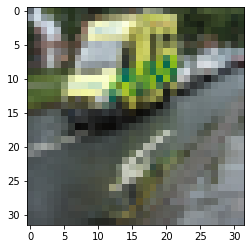

In [73]:
plt.imshow(sample_image.numpy() / 255.0)

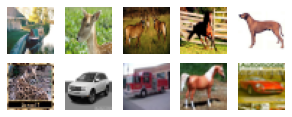

In [74]:
# load a batch of images
plt.figure(figsize=(5,5))
for index, image_path in enumerate(image_dataset.take(10), start=1):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, np.float32)
    
    ax = plt.subplot(5, 5, index)
    plt.imshow(image)
    plt.axis('off')
    
plt.show()
plt.close()